# Прогноз изменения стоимости жилья, НИР МГТУ им. Н.Э. Баумана.

# 1. Цель НИРа.

Целью научно-исследовательской работы является построение модели цен на жилье и прогнозирования медианной стоимости домов в Москве с использованием предоставленного набор данных. Эта модель должна учиться на данных и быть в состоянии пронозировать среднюю цену на жилье в любом районе с учетом всех других показателей.

# 2. Стек технологий.

2.1. Matplotlib

2.2. Pandas

2.3. Seaborn

2.4. Jupyter notebook

2.5. Python

2.6. Numpy

# 3. Текстовое описание набора данных.

В качестве набора данных будем использовать набор [MoscowHomes](https://www.kaggle.com/datasets/willianoliveiragibin/moscowhomes-dynamic-dataset), который представляет собой обширную коллекцию данных, необходимых для прогнозирования цен на жилье в Москве и Московской области. Набор данных собран в ноябре 2023 года и до сих пор остается актуальным, последнее изменение датасета происходило в феврале 2024 года. Он охватывает ряд свойств, необходимых для прогнозирования стоимости жилья, включая местоположение, размер, удобство и другие соответствуюещие факторы, влияющие на цены на недвижимость.

Одним из ключевых столбцов в наборе данных является "Price", представляющая цену квартиры в указанной валюте (рубли) и служащая основной целевой перменной для прогнозирования. Кроме того, такие атрибуты, как "Apartment type", обозначают классификацию квартиры: от студии до многокомнатных квартир. "Metro station" определяет ближайшую к месту расположения квартриры станцию метро, а "Minutes to metro" определяют время ходьбы, необходимое для достижения станции. В графе "Region@ указывается, находится ли объект в Москве или Московской области.

Дополнительные атрибуты дают представление о физических характеристиках квартир. "Number of rooms" указывает общее количество комнат, "Area" указывает общую площадь квартиры в квадратных метрах, а "Living area" обозначает жилую площадь. "Kitchen area" определяет размер кухни, а "Floor" и "Number of floors" о вертикальном положении квартиры в здании. В графе "Renovation" указан уровень ремонта: от "no renovation" to "euro renovation".

## Импорт бибилотек

Импортируем необходимые библиотеки: numpy, pandas, seaborn, matplotlib.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

## Загрузка данных

In [2]:
data = pd.read_csv  ('./MoscowEstate.csv', sep=",")

# 4. Основные характеристики датасета

In [5]:
# Первые 5 строк датасета
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,AVERAGE
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic,1.33
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation,1.53
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic,1.85
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation,1.58
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation,1.32


In [7]:
# Размер датасета
data.shape

(22676, 13)

Размер датасета - 22676 строк и 13 столбцов

In [8]:
# Список колонок и их типы данных
data.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
AVERAGE             float64
dtype: object

In [9]:
# Проверим наличие пустых значени
for col in data.columns: 
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Price - 0
Apartment type - 0
Metro station - 0
Minutes to metro - 0
Region - 0
Number of rooms - 0
Area - 0
Living area - 0
Kitchen area - 0
Floor - 0
Number of floors - 0
Renovation - 0
AVERAGE - 0


In [12]:
# Основные статистичекие характеристики набора данных
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,AVERAGE
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095,5.296189
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297,0.420917
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.210000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000,5.147407
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000,5.198425
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000,5.489325
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000,5.999900


В качестве целевого признака выбираем колонку Price (цена).

In [13]:
data['Price'].unique

<bound method Series.unique of 0         6300000.0
1         9000000.0
2        11090000.0
3         8300000.0
4         6450000.0
            ...    
22671     4768792.0
22672     5900000.0
22673     3700000.0
22674     5768869.0
22675     6839157.0
Name: Price, Length: 22676, dtype: float64>

# 5. Визуальное исследование датасета.

<Axes: xlabel='Area', ylabel='Living area'>

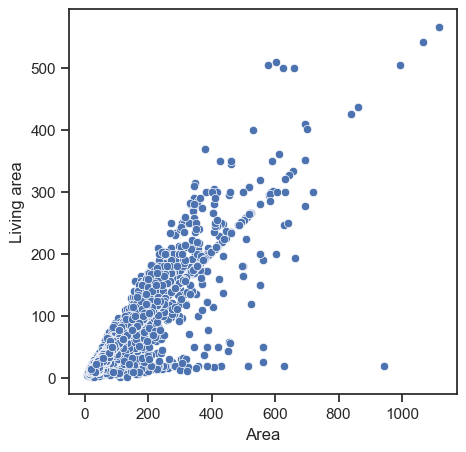

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(ax=ax, x="Area", y="Living area", data=data)

Посмотрим насколько целевой признак будет влиять на зависимость площади от количества комнат.

<Axes: xlabel='Area', ylabel='Living area'>

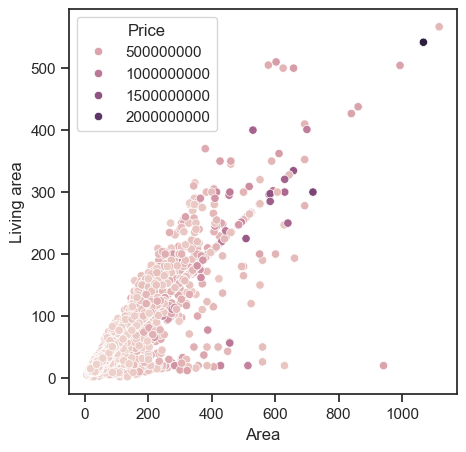

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x="Area", y="Living area", data=data, hue="Price")

Построим гистограммы, чтобы оценить плотность вероятности распределения данных.

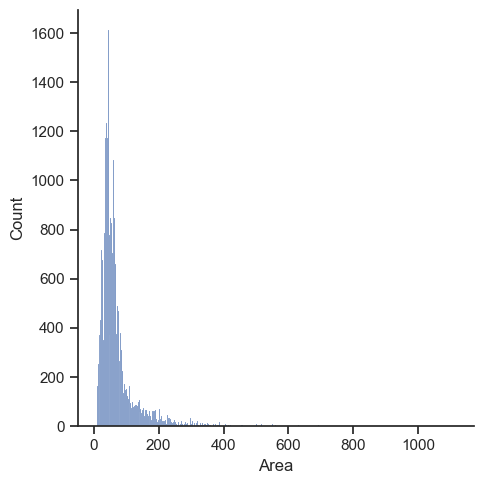

In [19]:
sns.displot(data['Area'])

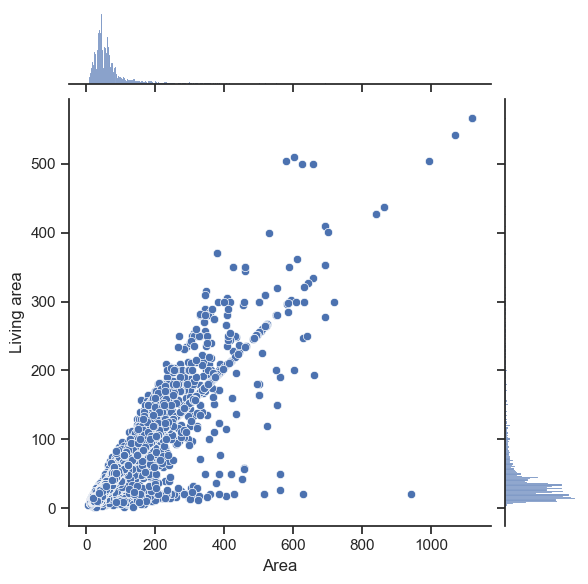

In [32]:
sns.jointplot(x="Area", y="Living area", data=data)

Построим парные диаграммы, комбинацию гистограмм и диаграмм рассеивания для всего набора данных.

Выведется матрица графиков. На пересечении стркои и стобца, которые соответствуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределния соответствующих показателей.

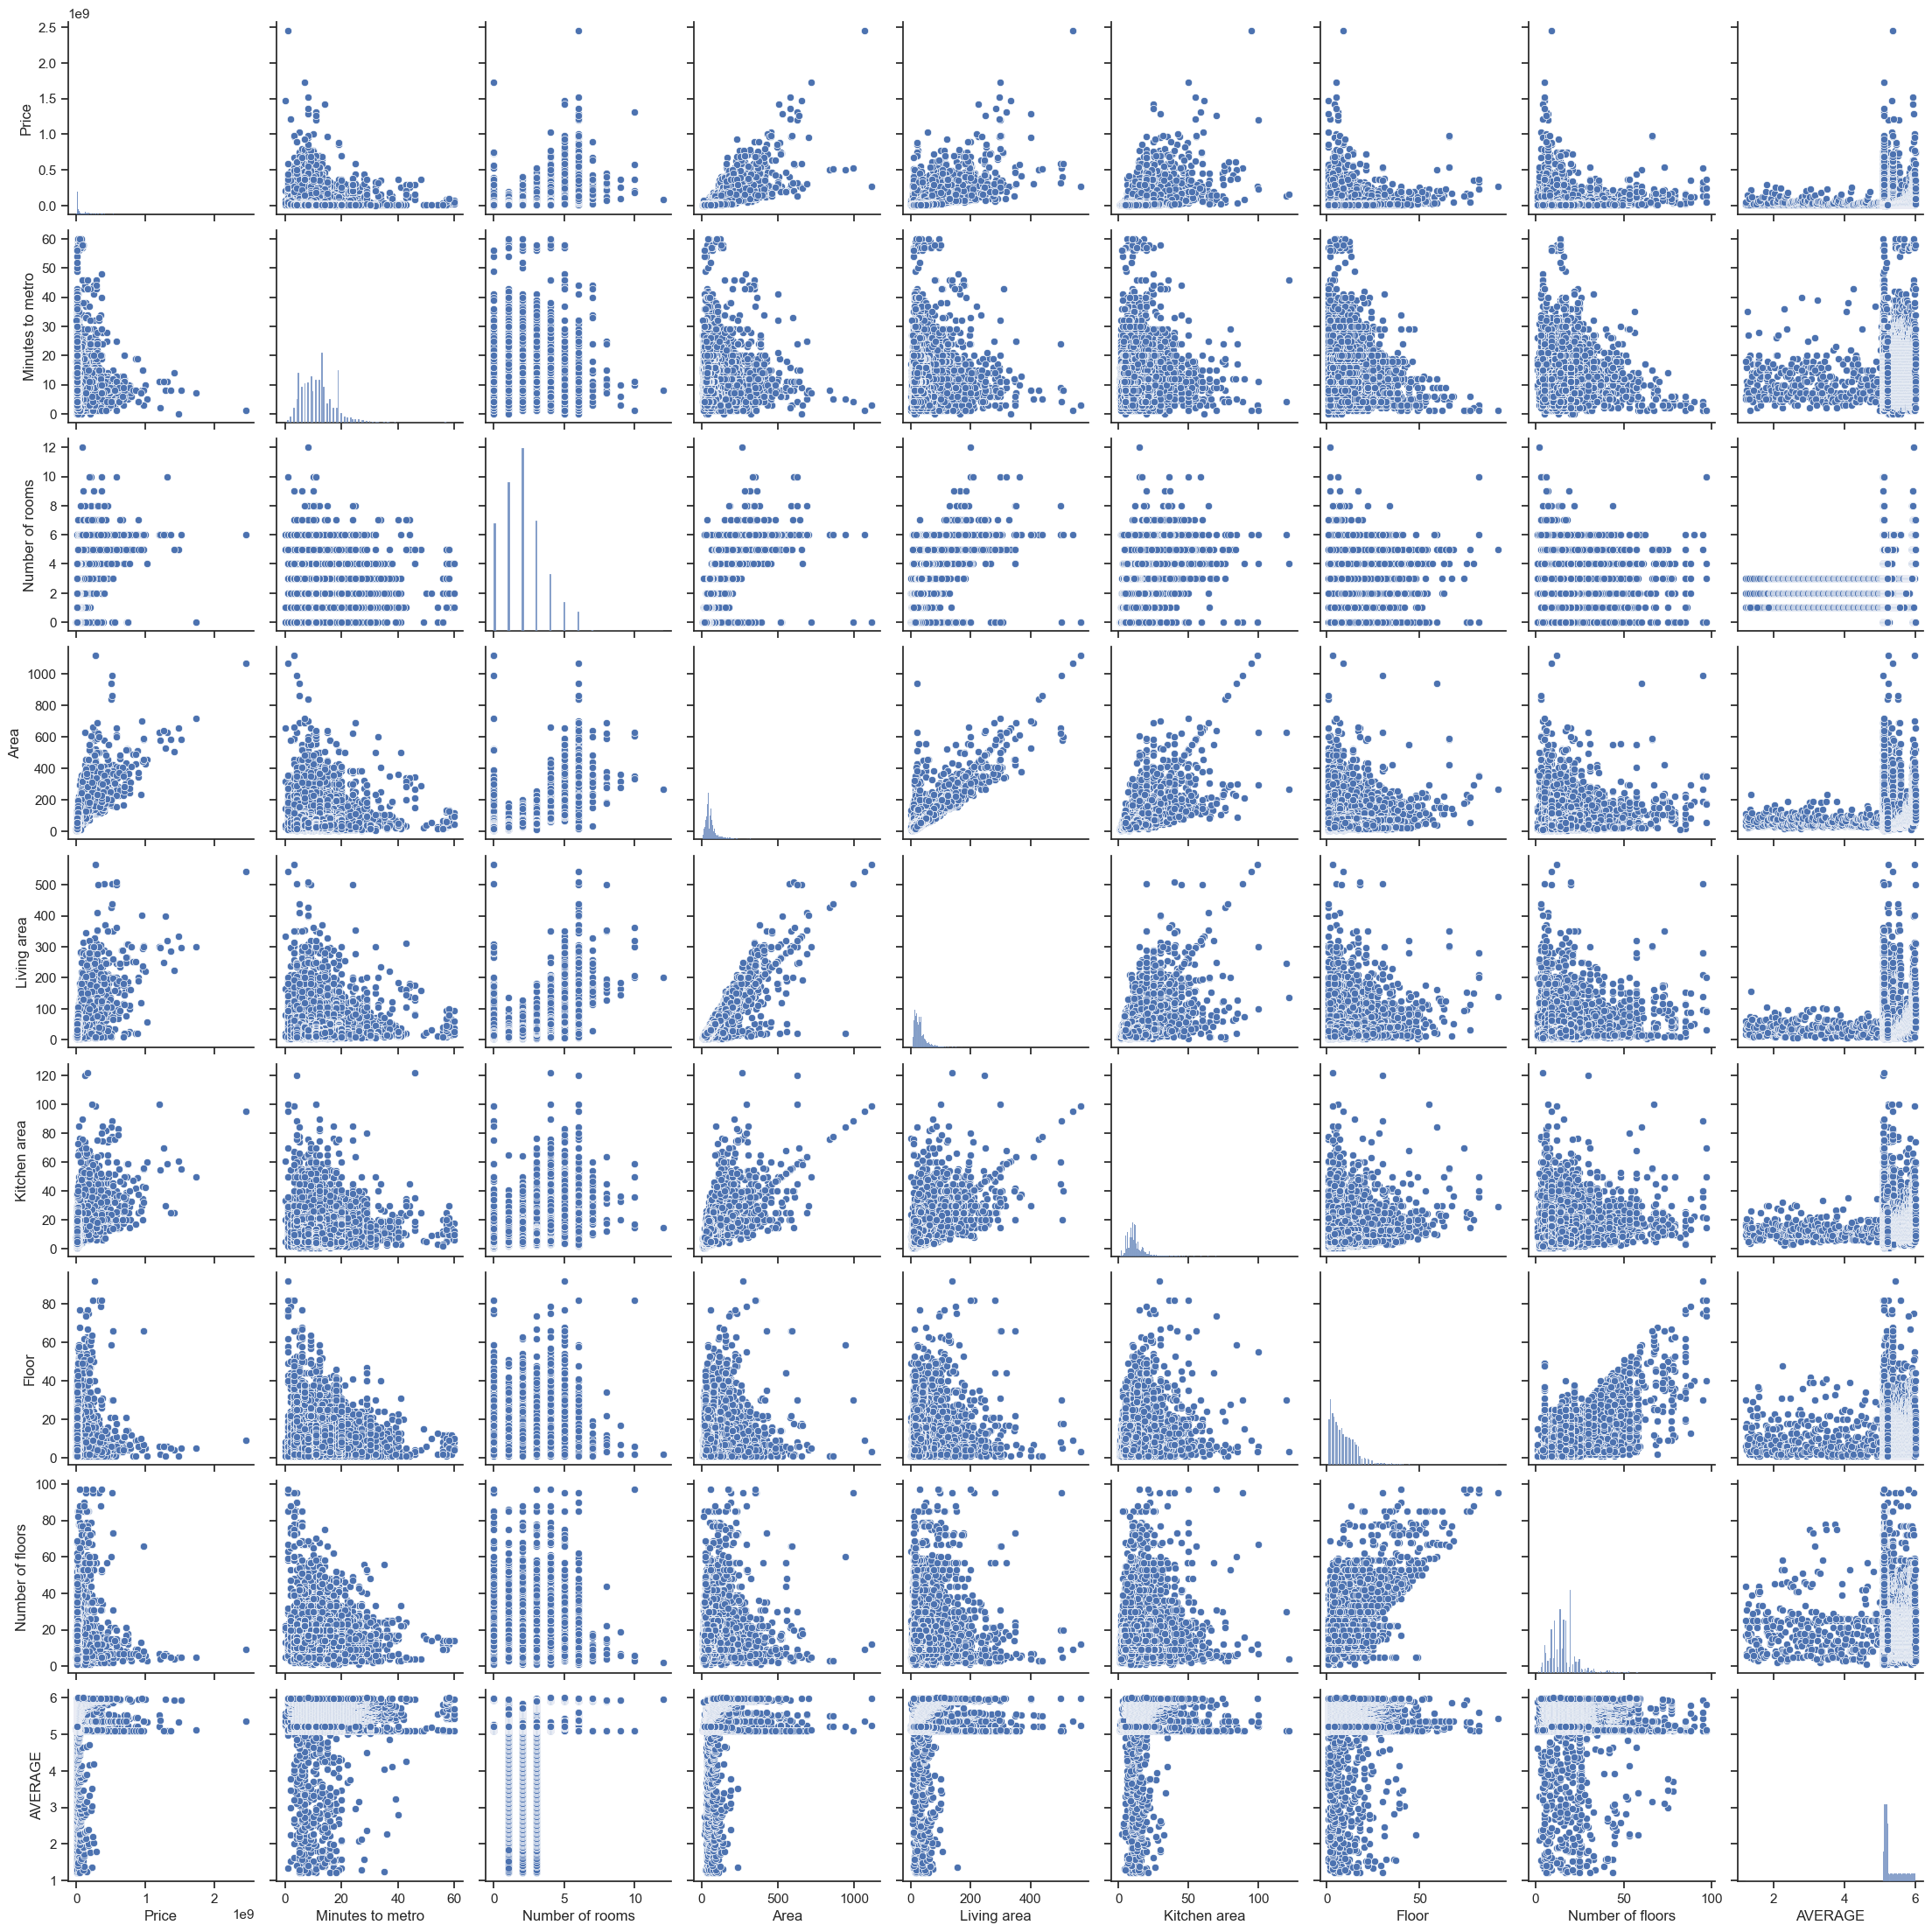

In [30]:
sns.pairplot(data)

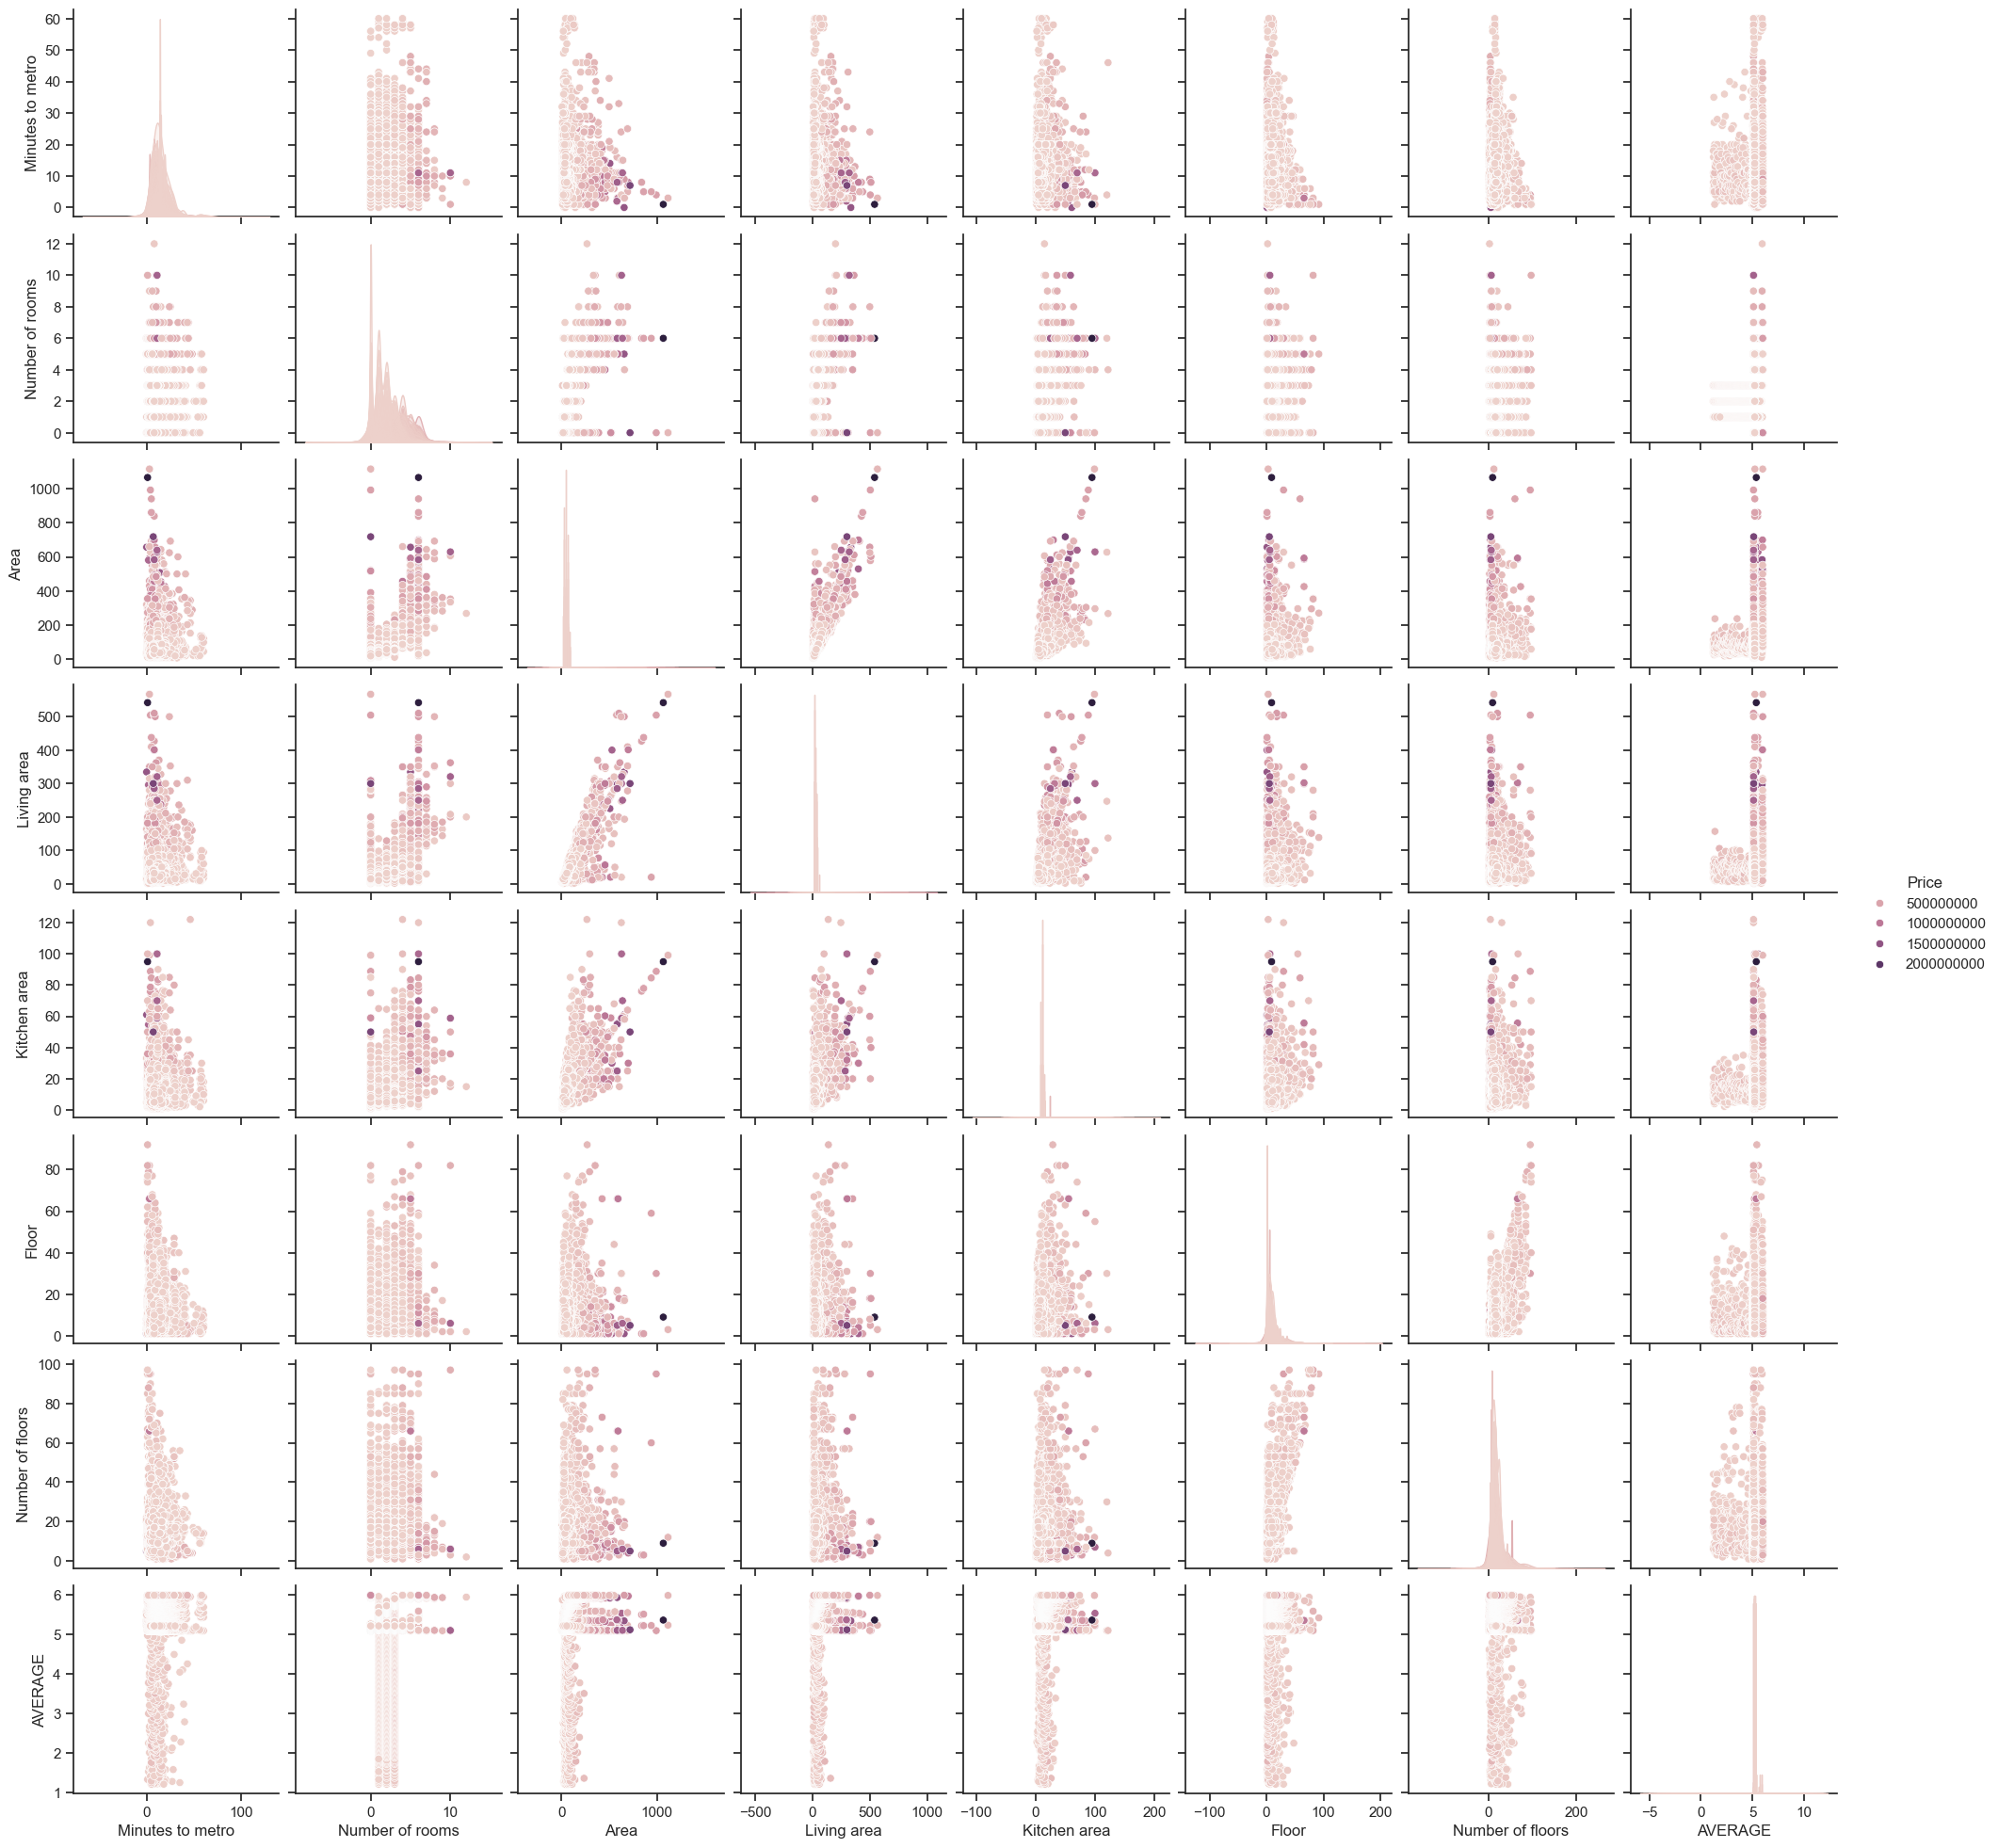

In [33]:
sns.pairplot(data, hue="Price")

# 6. Информация о корреляции признаков.

Проверка корреляции позволяет решить две задачи:

1. Понять какие признаци наиболее сильно коррелируют с целевым признаком (Стоимости жилья). Именно эти признаки будут наиболее информативными для модели машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели.
2. Понять какие нецелевые признаки линейно зависимы между собой.

In [39]:
data.corr(numeric_only=True, method="pearson")

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,AVERAGE
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134,0.057652
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209,0.068493
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045,0.196707
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465,0.101515
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737,0.123538
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035,0.053770
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803,-0.004191
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000,0.003697
AVERAGE,0.057652,0.068493,0.196707,0.101515,0.123538,0.053770,-0.004191,0.003697,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

1. Целевой признак (Цена) наиболее сильно коррелирует с общей площадью (0.79) и жилой площадью (0.709). Эти признаки стоит обязательно оставить в модели.
2. Целевой признак частично коррелирует с количеством комнат (0.49) и площадью кухни (0.58). Эти признаки стоит также оставить в модели.
3. Целевой признак слабо коррелирует с временем до метро, этажом, количеством этажей в доме. Эти признаки стоит исключить из модели, так как они ухудшат качество модели.
4. Общая площадь, жилая площадь и площадь кухни сильно коррелируют между собой - 0.9 и 0.73 соответственно, так как площадь кухни и жилая площадь являются производными от общей площади, следовательно, из этих признаков стоит оставить один единственный.
5. На основе п. 1 и п. 4, оставим признак "Общая площадь", так как она наиболее сильно коррелирует с целевым признаком.

Для сравнения также построим матрицы Кендалла и Спирмана.

In [42]:
data.corr(numeric_only=True, method="kendall")

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,AVERAGE
Price,1.000000,-0.077135,0.533386,0.621870,0.546266,0.408373,0.024846,-0.001193,0.279765
Minutes to metro,-0.077135,1.000000,-0.082109,-0.089950,-0.071946,-0.060075,0.054567,-0.005022,0.032047
Number of rooms,0.533386,-0.082109,1.000000,0.730015,0.693943,0.358168,0.054171,0.030860,0.265706
Area,0.621870,-0.089950,0.730015,1.000000,0.781877,0.519948,0.058121,0.026223,0.202850
Living area,0.546266,-0.071946,0.693943,0.781877,1.000000,0.349223,0.039100,0.010750,0.207659
Kitchen area,0.408373,-0.060075,0.358168,0.519948,0.349223,1.000000,0.099675,0.074217,0.067772
Floor,0.024846,0.054567,0.054171,0.058121,0.039100,0.099675,1.000000,0.356198,0.037734
Number of floors,-0.001193,-0.005022,0.030860,0.026223,0.010750,0.074217,0.356198,1.000000,0.065852
AVERAGE,0.279765,0.032047,0.265706,0.202850,0.207659,0.067772,0.037734,0.065852,1.000000


In [43]:
data.corr(numeric_only=True, method="spearman")

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,AVERAGE
Price,1.000000,-0.117317,0.662617,0.802978,0.717982,0.570844,0.037355,0.004079,0.386255
Minutes to metro,-0.117317,1.000000,-0.110084,-0.132447,-0.105287,-0.087107,0.077405,-0.003608,0.046808
Number of rooms,0.662617,-0.110084,1.000000,0.827770,0.791584,0.446263,0.074394,0.040487,0.318769
Area,0.802978,-0.132447,0.827770,1.000000,0.905419,0.674696,0.086652,0.038480,0.265801
Living area,0.717982,-0.105287,0.791584,0.905419,1.000000,0.454573,0.058762,0.015680,0.273417
Kitchen area,0.570844,-0.087107,0.446263,0.674696,0.454573,1.000000,0.143584,0.104664,0.094167
Floor,0.037355,0.077405,0.074394,0.086652,0.058762,0.143584,1.000000,0.477703,0.058054
Number of floors,0.004079,-0.003608,0.040487,0.038480,0.015680,0.104664,0.477703,1.000000,0.085755
AVERAGE,0.386255,0.046808,0.318769,0.265801,0.273417,0.094167,0.058054,0.085755,1.000000


Корреляционные матрицы Спирмана и Кендалла дают несильное отличие от матрицы Пирсона, поэтому оставим выбранные признаки как есть.

Для визуализации корреляционной матрицы построим heatmap, которая будет показывать степень корреляции различными цветами, построим "Тепловую карту" только для матрицы Пирсона.

<Axes: >

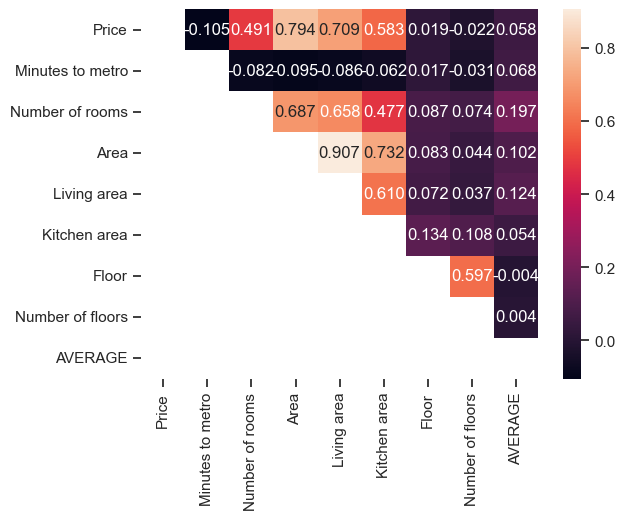

In [45]:
mask = np.zeros_like(data.corr(numeric_only=True))

mask[np.tril_indices_from(mask)]=True
sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f')

# 7. Подготовка данных

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Metro station'] = le.fit_transform(data['Metro station'])
data['Renovation'] = le.fit_transform(data['Renovation'])
data['Region'] = le.fit_transform(data['Region'])
data['Apartment type'] = le.fit_transform(data['Apartment type'])

In [51]:
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,AVERAGE
0,6300000.0,1,175,6.0,1,1.0,30.6,11.1,8.5,25.0,25,0,1.33
1,9000000.0,1,182,2.0,1,1.0,49.2,20.0,10.0,6.0,15,2,1.53
2,11090000.0,1,147,14.0,1,1.0,44.7,16.2,13.1,10.0,25,0,1.85
3,8300000.0,1,250,8.0,1,1.0,35.1,16.0,11.0,12.0,33,2,1.58
4,6450000.0,1,175,6.0,1,1.0,37.7,15.2,4.0,5.0,5,3,1.32


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  int64  
 2   Metro station     22676 non-null  int64  
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  int64  
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  int64  
 12  AVERAGE           22676 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.2 MB


# 8. Построение модели

Модели машинного обучения делятся по типу задач, которые они решают:

- Регрессионные модели - предсказывают числовую характеристику объекта . Например, стоимость квартиры исходя из ее площади или количество людей в аэропорту в зависимости от дня недели.
- Модели классификации - предсказывают категорию объекта по заранее заданным параметрам. Например, диагноз пациента на основе истории болезни, результатов анализов, симптомов.
- Регрессивно-классификационные модели - умеют решать задачи обоих типов.

Так какая модель обучения подойдет в данном случае? Так как наш целевой признак - числовой, то очевидно можно сделать вывод, что подойдет регрессионная модель обучения.

In [54]:
y = data.iloc[:, [0, 4, 6]].values

x = data.iloc[:, [1, 2, 3, 5, 7, 8, 9, 10, 11, 12]].values


In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
# model prediction

y_pred = model.predict(x_test)

In [60]:
# model accuracy

from sklearn.metrics import r2_score

r2_score(y_test, y_pred) * 100

84.00288342442228

Таким образом, получаем точность модели в 84%.